In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pickle
from matplotlib.colors import LogNorm

sns.set_theme()
sns.set(font_scale = 0.9)

# jupyter notebook full-width display
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# no text wrapping
display(HTML("<style>.dataframe td { white-space: nowrap; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.1f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

pd.set_option('display.max_colwidth', 200)

In [2]:
author = pd.read_csv('..\csv\csas2_author.csv')
request = pd.read_csv('..\csv\csas2_csasrequest.csv')
process = pd.read_csv('..\csv\csas2_process.csv')
document = pd.read_csv('..\csv\csas2_document.csv')
documenttracking = pd.read_csv('..\csv\csas2_documenttracking.csv')
meeting = pd.read_csv('..\csv\csas2_meeting.csv')
tor = pd.read_csv('..\csv\csas2_termsofreference.csv')

### Author

In [3]:
author.isnull().sum()

id             0
is_lead        0
document_id    0
person_id      0
dtype: int64

In [4]:
author.describe().T

,count,mean,std,min,25%,50%,75%,max
id,464.0,240.0,136.9,1.0,123.8,239.5,356.2,481.0
is_lead,464.0,0.6,0.5,0.0,0.0,1.0,1.0,1.0
document_id,464.0,196.8,219.9,1.0,97.8,146.0,202.2,1025.0
person_id,464.0,1907.2,1518.4,2.0,550.8,1244.0,3481.0,4384.0


In [5]:
author.groupby('person_id').count()[['is_lead', 'document_id']].describe()

,is_lead,document_id
count,238.0,238.0
mean,1.9,1.9
std,1.5,1.5
min,1.0,1.0
25%,1.0,1.0
50%,2.0,2.0
75%,2.0,2.0
max,14.0,14.0


In [6]:
author.groupby('person_id').count()[['is_lead', 'document_id']].sort_values('is_lead', ascending=False).head(10)

,is_lead,document_id
person_id,,
331,14,14
51,8,8
3238,6,6
13,6,6
97,6,6
3454,6,6
3687,6,6
149,5,5
3162,5,5


### request

In [7]:
request.isnull().sum()

id                           0
uuid                       210
created_at                   0
updated_at                   0
language                     0
title                        0
is_multiregional            65
multiregional_text         863
issue                      193
assistance_text            350
rationale                  198
risk_text                  205
advice_needed_by             0
rationale_for_timeline     215
has_funding                  0
funding_text               845
prioritization             464
prioritization_text        747
status                       0
submission_date            225
old_id                     892
client_id                    0
created_by_id              120
section_id                   0
updated_by_id              312
translated_title          1139
ref_number                 953
advice_fiscal_year_id        0
fiscal_year_id               0
office_id                    0
dtype: int64

In [8]:
request.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1198.0,699.0,396.0,2.0,343.2,705.5,1045.8,1355.0
language,1198.0,1.1,0.3,1.0,1.0,1.0,1.0,2.0
is_multiregional,1133.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
has_funding,1198.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
prioritization,734.0,1.5,0.7,1.0,1.0,1.0,2.0,3.0
status,1198.0,60.9,24.0,10.0,41.0,70.0,70.0,99.0
old_id,306.0,9999.0,0.0,9999.0,9999.0,9999.0,9999.0,9999.0
client_id,1198.0,1785.2,545.7,19.0,1206.2,1927.5,2151.8,2905.0
created_by_id,1078.0,1495.1,697.2,50.0,1142.0,1555.0,2077.0,2909.0
section_id,1198.0,158.9,44.5,1.0,129.0,142.0,204.0,228.0


STATUS

    request_status_choices = (
        (10, _("Draft")),
        (20, _("Under Client Approval")),  # client submits request
        (25, _("Awaiting Changes")),

        (30, _("Ready for CSAS Review")),  # client review is complete
        (40, _("Under CSAS Review")),  # review is created by coordinator

        # all status below here should correspond to review decision choice + 40
        (41, _("Screened-in")),  # coordinator approves
        (42, _("Flagged")),  # client (coordinator) withdraws
        (43, _("Re-scoping")),  # coordinator want to re-scope the request

        (70, _("Refer to Process")),
        (80, _("Fulfilled")),
        (99, _("Withdrawn")),
    )

In [9]:
request.status.value_counts().sort_index()

10     38
20     10
30     80
40    164
41    159
42     52
43     11
70    410
80     82
99    192
Name: status, dtype: int64

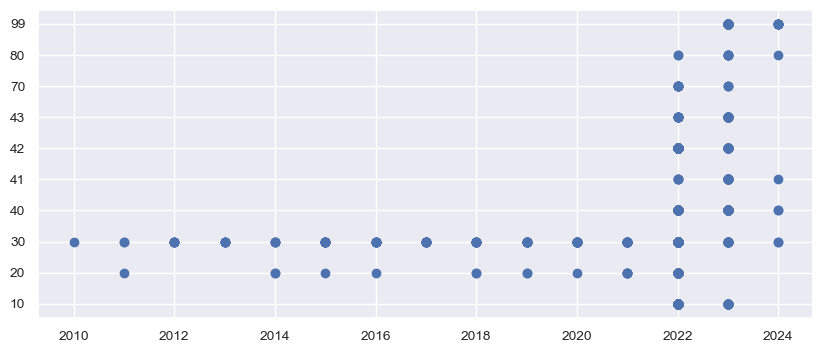

In [10]:
plt.figure(figsize=(10,4))
plt.scatter(x=request.fiscal_year_id, y=request.status.astype('str'))
ticks = sorted(request.status.astype('str').unique())
plt.yticks([x for x in range(len(ticks))], ticks)
plt.show()

### process

In [11]:
process.isnull().sum()

id                           0
uuid                         0
created_at                   0
updated_at                   0
name                         0
nom                        194
status                       0
scope                        0
type                         0
created_by_id                0
fiscal_year_id               0
updated_by_id              239
advice_date                  1
lead_office_id               0
has_peer_review_meeting      0
has_planning_meeting         0
dtype: int64

In [12]:
process.describe().T

,count,mean,std,min,25%,50%,75%,max
id,527.0,336.4,181.2,2.0,180.5,348.0,494.5,626.0
status,527.0,39.9,32.0,1.0,25.0,25.0,30.0,100.0
scope,527.0,1.4,0.8,1.0,1.0,1.0,1.0,3.0
type,527.0,1.5,0.5,1.0,1.0,1.0,2.0,2.0
created_by_id,527.0,1169.7,599.2,62.0,651.0,1142.0,1500.0,2280.0
fiscal_year_id,527.0,2021.4,2.9,2010.0,2020.0,2023.0,2023.0,2026.0
updated_by_id,288.0,1219.1,689.5,50.0,576.0,1142.0,1500.0,2862.0
lead_office_id,527.0,4.1,1.9,1.0,2.0,4.0,6.0,7.0
has_peer_review_meeting,527.0,0.8,0.4,0.0,1.0,1.0,1.0,1.0
has_planning_meeting,527.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0


STATUS

    process_status_dict = (
        dict(trigger=None, stage="initiation", text=_("Initiated"), value=1),
        ####################
        dict(trigger=None, stage="tentative", text=_("Tentative"), value=10),
        ####################
        dict(trigger=None, stage="on", text=_("On"), value=20),
        ####################
        dict(trigger=None, stage="in-progress", text=_("ToR Complete"), value=22),
        dict(trigger=None, stage="in-progress", text=_("Meeting Complete"), value=25),
        ####################
        dict(trigger=None, stage="deferred", text=_("Deferred"), value=30),
        ####################
        dict(trigger=None, stage="complete", text=_("Complete"), value=100),
        ####################
        dict(trigger=None, stage="withdrawn", text=_("Withdrawn"), value=90),
    )

In [13]:
process.status.value_counts().sort_index()

1       19
10      26
20      44
22      33
25     244
30      38
90      40
100     83
Name: status, dtype: int64

### document

In [14]:
document.isnull().sum()

id                            0
created_at                    0
updated_at                    0
title_en                      7
title_fr                    407
title_iku                   990
pub_number                  420
pages_en                    481
status                        0
old_id                      206
created_by_id                 0
process_id                    0
updated_by_id               791
url_en                      473
url_fr                      474
dev_link_en                 902
dev_link_fr                 905
ekme_gcdocs_en              496
ekme_gcdocs_fr              600
cat_number_en               753
cat_number_fr               754
document_type_id              0
translation_status            0
pub_number_request_date     963
due_date                    916
is_confirmed                  0
lead_office_id                7
pages_fr                    601
pdf_size_kb_en              493
pdf_size_kb_fr              605
cat_number_iku              991
library_

In [15]:
document.due_date.isnull().value_counts()

True     916
False     75
Name: due_date, dtype: int64

In [16]:
def _(x):
    """dummy function, in place of translate"""
    return x
    
document_status_dict = (
    dict(trigger=None, stage="awaiting-changes", text=_("Unconfirmed"), value=0),
    dict(trigger=None, stage="confirmed", text=_("Confirmed"), value=1),
    ####################
    dict(trigger="submission_date", stage="preparation", text=_("Submitted by author"), value=2),
    ####################
    dict(trigger="date_chair_sent", stage="review", text=_("Under review by chair"), value=3),
    dict(trigger="date_chair_appr", stage="review", text=_("Approved by chair"), value=4),
    dict(trigger="date_coordinator_sent", stage="review", text=_("Under review by CSAS coordinator"), value=5),
    dict(trigger="date_coordinator_appr", stage="review", text=_("Approved by CSAS coordinator"), value=6),
    dict(trigger="date_section_head_sent", stage="review", text=_("Under review by section head"), value=13),
    dict(trigger="date_section_head_appr", stage="review", text=_("Approved by section head"), value=14),
    dict(trigger="date_division_manager_sent", stage="review", text=_("Under review by division manager"), value=15),
    dict(trigger="date_division_manager_appr", stage="review", text=_("Approved by division manager"), value=16),
    dict(trigger="date_director_sent", stage="review", text=_("Under review by director"), value=7),
    dict(trigger="date_director_appr", stage="review", text=_("Approved by director"), value=8),

    ####################
    dict(trigger="date_doc_submitted", stage="finalization", text=_("Submitted to CSAS office"), value=9),
    dict(trigger="date_proof_author_sent", stage="finalization", text=_("Proof sent to author"), value=10),
    dict(trigger="date_proof_author_approved", stage="finalization", text=_("Proof approved by author"), value=11),
    ####################
    dict(trigger="actual_posting_date", stage="final", text=_("Posted"), value=12),
    dict(trigger="updated_posting_date", stage="final", text=_("Posted (updated)"), value=17),
    ####################
    dict(trigger=None, stage="withdrawn", text=_("Withdrawn"), value=99),
)

document_status = {}
for dct in document_status_dict:
    document_status[dct['value']] = dct['text']

In [17]:
due_dates = []
for k,v in document[document.due_date.notnull()].status.value_counts().sort_index().to_dict().items():
    due_dates += [[k, document_status[k], v]]

pd.DataFrame(due_dates, columns=['code', 'status', 'count']).set_index('code')

,status,count
code,,
0,Unconfirmed,1
1,Confirmed,3
2,Submitted by author,1
3,Under review by chair,1
5,Under review by CSAS coordinator,2
6,Approved by CSAS coordinator,3
7,Under review by director,1
9,Submitted to CSAS office,6
11,Proof approved by author,1


In [18]:
all_documents = []
for k,v in document.status.value_counts().sort_index().to_dict().items():
    all_documents += [[k, document_status[k], v]]

pd.DataFrame(all_documents, columns=['code', 'status', 'count']).set_index('code')

,status,count
code,,
0,Unconfirmed,24
1,Confirmed,312
2,Submitted by author,2
3,Under review by chair,1
5,Under review by CSAS coordinator,5
6,Approved by CSAS coordinator,3
7,Under review by director,1
8,Approved by director,1
9,Submitted to CSAS office,27


In [19]:
document.describe().T

,count,mean,std,min,25%,50%,75%,max
id,991.0,522.5,294.1,1.0,263.5,528.0,776.5,1025.0
pages_en,510.0,38.6,36.6,2.0,16.0,26.0,46.8,263.0
status,991.0,12.5,20.6,0.0,1.0,12.0,12.0,99.0
old_id,785.0,9368.8,1177.2,5852.0,8873.0,9757.0,10295.0,10645.0
created_by_id,991.0,1219.4,466.6,62.0,1142.0,1142.0,1142.0,2858.0
process_id,991.0,434.9,168.5,2.0,403.0,491.0,547.0,623.0
updated_by_id,200.0,2368.9,830.2,50.0,2359.0,2858.0,2862.0,2862.0
document_type_id,991.0,3.1,0.9,2.0,3.0,3.0,4.0,8.0
translation_status,991.0,5.2,21.6,0.0,0.0,0.0,0.0,99.0
is_confirmed,991.0,1.0,0.2,0.0,1.0,1.0,1.0,1.0


### documenttracking

In [20]:
documenttracking.isnull().sum()

id                              0
created_at                      0
updated_at                      0
created_by_id                   0
document_id                     0
updated_by_id                   2
actual_posting_date           379
anticipated_posting_date      819
chair_id                      740
client_ref_number             908
date_chair_appr               817
date_chair_sent               830
date_coordinator_appr         816
date_coordinator_sent         826
date_director_appr            854
date_director_sent            858
date_doc_submitted            352
due_date                      844
date_proof_author_approved    446
date_proof_author_sent        420
date_returned                 839
submission_date               813
date_translation_sent         832
director_id                   844
invoice_number                915
is_urgent                       0
proof_sent_to_id              759
submitted_by_id               739
target_lang                   827
translation_no

In [21]:
documenttracking.describe().T

,count,mean,std,min,25%,50%,75%,max
id,919.0,487.2,271.7,2.0,261.5,491.0,721.5,952.0
created_by_id,919.0,1207.0,441.7,50.0,1142.0,1142.0,1142.0,2862.0
document_id,919.0,548.5,285.4,1.0,331.5,561.0,791.5,1024.0
updated_by_id,917.0,1325.5,520.5,50.0,1142.0,1142.0,1142.0,2862.0
chair_id,179.0,972.2,1194.8,2.0,96.5,597.0,1023.5,4037.0
director_id,75.0,1080.3,1218.8,47.0,67.0,67.0,1520.0,3348.0
invoice_number,4.0,92407709.5,23363.1,92392194.0,92396577.0,92398068.5,92409201.0,92442507.0
is_urgent,919.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
proof_sent_to_id,160.0,1403.3,1434.3,2.0,312.2,848.0,3238.0,4384.0
submitted_by_id,180.0,1409.2,1472.9,2.0,213.5,848.0,3238.0,4384.0


In [22]:
documenttracking.is_urgent.value_counts()

0    918
1      1
Name: is_urgent, dtype: int64

### meeting

In [23]:
meeting.describe().T

,count,mean,std,min,25%,50%,75%,max
id,555.0,333.6,180.1,2.0,181.5,346.0,490.5,629.0
created_by_id,507.0,1340.0,688.9,62.0,1142.0,1142.0,1984.0,2862.0
fiscal_year_id,555.0,2021.3,2.8,2010.0,2020.0,2022.0,2023.0,2025.0
process_id,555.0,304.2,195.1,2.0,117.0,317.0,476.5,626.0
updated_by_id,255.0,1529.8,892.6,50.0,576.0,1500.0,2260.0,2862.0
is_virtual,555.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0
is_planning,555.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
is_estimate,555.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
is_posted,555.0,0.6,0.5,0.0,0.0,1.0,1.0,1.0
has_media_attention,555.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0


In [24]:
for x in [x for x in meeting.columns if str(x)[0:3]=='is_']:
    display(meeting[x].value_counts())

0    293
1    262
Name: is_virtual, dtype: int64

0    453
1    102
Name: is_planning, dtype: int64

0    434
1    121
Name: is_estimate, dtype: int64

1    325
0    230
Name: is_posted, dtype: int64

0    303
1    252
Name: is_somp_submitted, dtype: int64

### tor

In [25]:
tor.describe().T

,count,mean,std,min,25%,50%,75%,max
id,527.0,329.7,181.1,1.0,172.5,340.0,488.5,620.0
process_id,527.0,336.4,181.2,2.0,180.5,348.0,494.5,626.0
created_by_id,235.0,1226.0,664.8,50.0,1093.5,1142.0,1500.0,2862.0
updated_by_id,234.0,1423.5,879.5,50.0,594.8,1142.0,2260.0,2862.0
meeting_id,209.0,224.9,125.1,2.0,135.0,221.0,310.0,625.0
status,527.0,33.7,19.4,10.0,10.0,50.0,50.0,50.0


STATUS

    tor_status_choices = (
        (10, _("Draft")),
        (20, _("Under review")),
        (30, _("Awaiting changes")),
        (35, _("Approved")),
        (40, _("Awaiting posting")),
        (50, _("Posted")),
    )

In [26]:
tor.status.value_counts().sort_index()

10    210
20      1
35      6
40      8
50    302
Name: status, dtype: int64

In [27]:
tor[[x for x in tor.columns if str(x)[-2:]!='id' and x!='status']].dtypes

context_en                   object
objectives_en                object
participation_en             object
references_en                object
created_at                   object
updated_at                   object
context_fr                   object
objectives_fr                object
participation_fr             object
references_fr                object
posting_notification_date    object
posting_request_date         object
submission_date              object
dtype: object

In [28]:
# create length of cell contents columns for all object columns
for x in [x for x in tor.columns if str(x)[-2:]!='id' and x!='status']:
    tor['len_'+x] = tor[x].str.len()

In [29]:
tor[[x for x in tor.columns if str(x)[0:3]=='len']].describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
len_context_en,324.0,1147.6,964.9,2.0,480.8,843.5,1508.5,6133.0
len_context_fr,136.0,1933.8,1283.7,287.0,1078.0,1588.0,2678.8,7101.0
len_created_at,527.0,26.0,0.0,26.0,26.0,26.0,26.0,26.0
len_objectives_en,320.0,997.2,1056.4,1.0,415.5,696.0,1249.2,11041.0
len_objectives_fr,136.0,1359.3,1627.1,111.0,527.8,868.5,1584.8,12950.0
len_participation_en,143.0,188.9,137.3,20.0,91.5,168.0,230.5,714.0
len_participation_fr,135.0,218.3,160.0,46.0,100.5,186.0,276.5,855.0
len_posting_notification_date,120.0,26.0,0.0,26.0,26.0,26.0,26.0,26.0
len_posting_request_date,102.0,26.0,0.0,26.0,26.0,26.0,26.0,26.0
len_references_en,97.0,767.3,845.1,94.0,307.0,499.0,915.0,5060.0
